In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Loading the dataset 

In [2]:
churn_data= pd.read_csv("churn_data.csv");

In [3]:
churn_data.head()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10


### Understanding the dataset: Sanity Check

A sanity check of a dataset is a set of preliminary checks and validations to ensure that the data is reasonable, consistent, and free from obvious errors before conducting more detailed analysis or building models. It helps in identifying and correcting issues early in the data processing pipeline, saving time and resources.

In [22]:
#Checking the shape
print(churn_data.shape)
print('\n')

# Checking Dataset Info 
print(churn_data.info(verbose=True))

(25000, 111)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 111 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    s6.new.rev.p2.m2            float64
 1    s1.new.rev.m1               float64
 2    s3.og.rev.4db.p5            float64
 3    s3.new.rev.4db.p5           float64
 4    s4.usg.ins.p2               int64  
 5    s4.og.unq.any.p2            int64  
 6    s2.rch.val.p6               float64
 7    s1.og.rev.all.m1            float64
 8    s8.new.rev.p6               float64
 9    s4.loc.ic.ins.p1            int64  
 10   s8.mbl.p2                   float64
 11   s2.rch.val.l67              float64
 12   s7.s4.day.no.mou.p2.p4      float64
 13   s3.new.rev.p3               float64
 14   s7.s5.s4.day.nomou.p4       float64
 15   s8.og.rev.p3                float64
 16   s8.ic.mou.all.p3            float64
 17   target                      int64  
 18   s7.new.rev.p2.p6            f

### Summary and Checking Outliers

**Reasons to calculate the 0.99 percentile:**
<br>
Outlier Detection: The 0.99 percentile can help **identify extreme values or outliers** in the dataset. Values above this threshold can be considered outliers and may require further investigation or handling.

<br>
Risk Management: In finance and insurance, the 99th percentile is often used to **assess Value at Risk (VaR) or potential extreme losses**. It provides insights into the worst-case scenarios that can be expected 1% of the time.

In [23]:
churn_data.describe(percentiles=[0.25,0.5,0.75,0.99])
# Each value represents the threshold below which x% of the data for that specific column falls

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,-0.028327,3.254720,...,0.538407,0.485523,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,0.483975,9.951366
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,0.354573,1.193271,...,0.209203,0.271146,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,0.292349,17.648128
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,-5.090000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,-0.160000,3.000000,...,0.394227,0.274034,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,0.251304,1.970000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,-0.020000,4.000000,...,0.539354,0.476759,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,0.477621,5.380000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,0.110000,4.000000,...,0.682695,0.694104,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,0.716538,11.400000
99%,3.040000,1298.073753,20.943683,29.381655,7.000000,129.000000,300.000000,1098.201190,1.000000,4.000000,...,0.977610,0.995526,7.000000,13.000000,30.000000,30.740400,57.150400,97.798840,1.000000,92.350700
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,5.000000,4.000000,...,1.000000,1.000000,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,1.000000,585.500000


In [24]:
# Count the occurrences of each value in the 'target' column
value_counts = churn_data['target'].value_counts()

# Calculate the percentage for each value
percentages = (value_counts / len(churn_data)) * 100

# Print the results
print("Percentage of customers who have not churned (0): {:.2f}%".format(percentages[0]))
print("Percentage of customers who have churned (1): {:.2f}%".format(percentages[1]))

Percentage of customers who have not churned (0): 68.33%
Percentage of customers who have churned (1): 31.67%


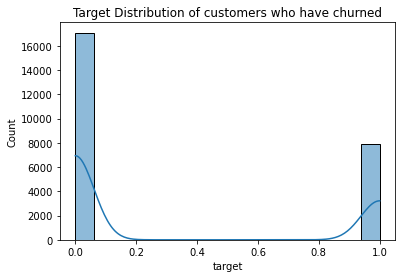

In [25]:
# Distribution Plot for 'target' column
sns.histplot(data=churn_data, x="target", kde=True, multiple="stack")

# Display the plot
plt.title("Target Distribution of customers who have churned")
plt.show()

### Selecting columns for Pairplot and Heatmap

To choose a subset of columns for a pairplot or heatmap, it's important to select features that have meaningful relationships and are relevant for analysis. Since your dataset is related to churn prediction. Features that are likely to have a significant impact on whether a customer churns or not are:

**Revenue-related columns:** Revenue is often a critical indicator of customer behavior.

1) s6.new.rev.p2.m2
2) s1.new.rev.m1
3) s3.og.rev.4db.p5
4) s8.new.rev.p6

**Target column:** helps to distinguish between churned and non-churned customers.

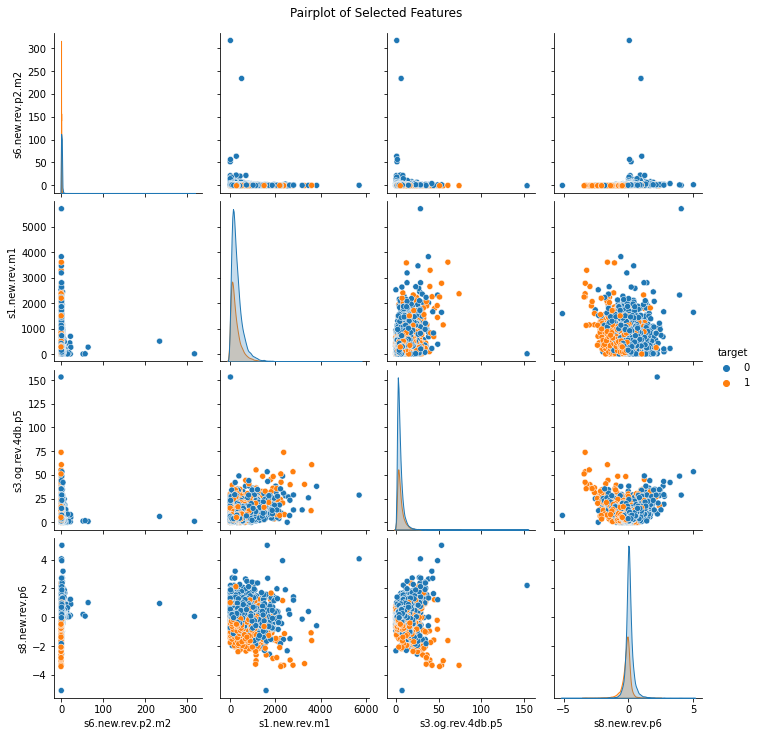

In [26]:
# Select a subset of columns for the pairplot
selected_columns = [ 's6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5', 's8.new.rev.p6','target']

# Pairplot of selected features
sns.pairplot(churn_data[selected_columns], diag_kind="kde", hue='target')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

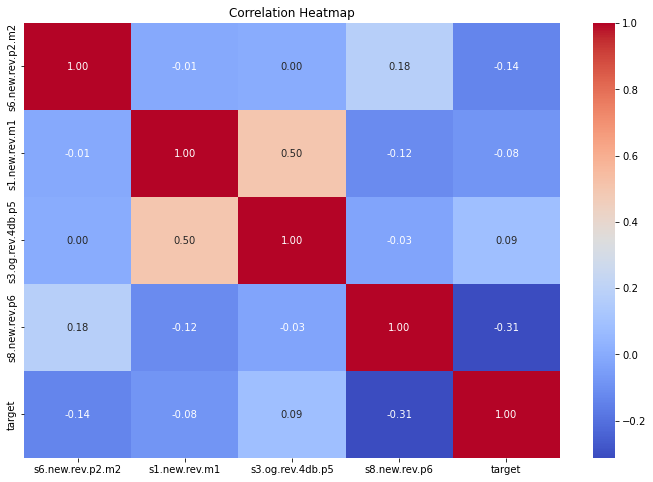

In [27]:
# Heatmap of the correlation matrix

plt.figure(figsize=(12, 8))
correlation_matrix = churn_data[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# DATA PREPROCESSING STEPS

### 1) Removing Duplicate Records

Removing duplicate records is crucial for ensuring data integrity, improving model performance, enhancing resource efficiency, and obtaining accurate insights. By cleaning the dataset of duplicates, you ensure that the data is a true representation of the underlying phenomena, **leading to more reliable and valid outcomes** in data analysis and machine learning tasks.

In [28]:
print("Number of records before removing duplicates: ", len(churn_data))
churn_data.drop_duplicates(inplace=True)
print("Number of records after removing duplicates: ", len(churn_data))

Number of records before removing duplicates:  25000
Number of records after removing duplicates:  25000


### 2) Removing Unique Value Variables

Unique value variables are those where **each observation has a unique value**, making them uninformative for many types of analyses.

In [29]:
num_columns_before = len(churn_data.columns)
for column in churn_data.columns:
    if len(churn_data[column].unique()) == 1:
        churn_data.drop(column, axis=1, inplace=True)
num_columns_after = len(churn_data.columns)
print("Number of columns before removing unique value variables:", num_columns_before)
print("Number of columns after removing unique value variables:", num_columns_after)

Number of columns before removing unique value variables: 111
Number of columns after removing unique value variables: 111


### 3) Removing Zero Variance Variables

Zero variance variables are those where **all observations have the same value** , making them uninformative for most analyses.

In [30]:
num_columns_before = len(churn_data.columns)
for column in churn_data.columns:
    if churn_data[column].var() == 0:
        churn_data.drop(column, axis=1, inplace=True)
num_columns_after = len(churn_data.columns)
print("Number of columns before removing zero variance variables:", num_columns_before)
print("Number of columns after removing zero variance variables:", num_columns_after)

Number of columns before removing zero variance variables: 111
Number of columns after removing zero variance variables: 111


## 4) OUTLIER TREATMENT

Outliers are data points that deviate significantly from the majority of the data. Proper treatment of outliers is crucial because they can distort statistical analyses and machine learning models, leading to inaccurate results and poor performance.

**Importance of Outlier Treatment:**

Accuracy of Statistical Analysis - skewed mean, variances<br>
Model Performance - overfitting or underfitting<br>
Data Quality - data entry errors or rare events<br>
Normalization & Standardization

### a) Using Boxplot: Q3 + (1.5* IQR) & Q1- (1.5* IQR)  

This method identifies outliers based on the **interquartile range** (IQR)<br>
IQR is the range between the first quartile (Q1) and the third quartile (Q3)<br>
Outliers are typically defined as values beyond Q3 + (1.5* IQR) or below Q1 − (1.5* IQR)<br>

In [8]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(data_column, multiplier=1.5):
    Q1 = np.percentile(data_column, 25)
    Q3 = np.percentile(data_column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return (data_column < lower_bound) | (data_column > upper_bound)

multiplier = 2.5 
outliers = {}
for column in churn_data.select_dtypes(include=np.number).columns:
    outliers[column] = detect_outliers_iqr(churn_data[column], multiplier=multiplier)

# Outliers counts
outlier_counts = {col: outliers[col].sum() for col in outliers}
for col, count in outlier_counts.items():
    print(f"Column '{col}': {count} outliers detected")

# Removing outliers
def remove_outliers(df, multiplier=1.5):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        outlier_mask = detect_outliers_iqr(df[column], multiplier=multiplier)
        df = df[~outlier_mask]
    return df

# Make a copy of the original DataFrame before removing outliers
churn_data_clean = churn_data.copy()
churn_data_clean = remove_outliers(churn_data_clean, multiplier=multiplier)

print("Number of records after outlier treatment:", len(churn_data_clean))

Column 's6.new.rev.p2.m2': 424 outliers detected
Column 's1.new.rev.m1': 549 outliers detected
Column 's3.og.rev.4db.p5': 704 outliers detected
Column 's3.new.rev.4db.p5': 982 outliers detected
Column 's4.usg.ins.p2': 0 outliers detected
Column 's4.og.unq.any.p2': 406 outliers detected
Column 's2.rch.val.p6': 597 outliers detected
Column 's1.og.rev.all.m1': 691 outliers detected
Column 's8.new.rev.p6': 941 outliers detected
Column 's4.loc.ic.ins.p1': 1546 outliers detected
Column 's8.mbl.p2': 2750 outliers detected
Column 's2.rch.val.l67': 619 outliers detected
Column 's7.s4.day.no.mou.p2.p4': 0 outliers detected
Column 's3.new.rev.p3': 1098 outliers detected
Column 's7.s5.s4.day.nomou.p4': 0 outliers detected
Column 's8.og.rev.p3': 1162 outliers detected
Column 's8.ic.mou.all.p3': 1355 outliers detected
Column 'target': 0 outliers detected
Column 's7.new.rev.p2.p6': 86 outliers detected
Column 's6.rtd.mou.p2.m2': 509 outliers detected
Column 's7.rtd.mou.p2.p6': 141 outliers detected
C

### b) Using Three Sigma Approach  

This method uses the **mean** (μ) and **standard deviation** (𝜎) of the data. Outliers are identified as data points that lie beyond **μ±3σ** <br>
**Usage:** Suitable for normally distributed data.

In statistical theory, particularly when dealing with normally distributed data about 99.73% of the data points are expected to have a Z-score less than 3 (empirical rule)

In [3]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data_column):
    threshold = 3  # Define the threshold for outlier detection
    mean = np.mean(data_column)
    std_dev = np.std(data_column)
    z_scores = np.abs((data_column - mean) / std_dev)
    return z_scores > threshold

# Detect outliers for each numeric column using Z-score approach
outliers = {}
for column in churn_data.select_dtypes(include=np.number):
    outliers[column] = detect_outliers_zscore(churn_data[column])

# Remove outliers from the dataset
def remove_outliers_zscore(df, outliers):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df = df.loc[~outliers[column]]
    return df

churn_data_clean = remove_outliers_zscore(churn_data, outliers)

# Print number of records after outlier treatment
print("Number of records after outlier treatment:", len(churn_data_clean))

Number of records after outlier treatment: 17612


### c) Using Capping and Flooring 

Values above the upper bound are capped to a specified maximum value, and values below the lower bound are floored to a specified minimum value.<br>
Preferred when it is important to maintain all data points but mitigate the impact of extreme values. This is often used in financial data or when preparing data for machine learning models that are sensitive to outliers.<br>

**Usage:** Useful when outliers are suspected to be data entry errors<br>
**Cons:** Can distort the distribution of the data; the choice of bounds is arbitrary and may need domain knowledge


In [4]:
# Function to cap and floor outliers based on percentile
def cap_floor_outliers_percentile(df, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    
    # Apply capping and flooring
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df[column] = df[column].apply(lambda x: upper_bound[column] if x > upper_bound[column] else x)
        df[column] = df[column].apply(lambda x: lower_bound[column] if x < lower_bound[column] else x)
    
    return df

# Apply the function to churn_data
churn_data_clean = cap_floor_outliers_percentile(churn_data)

# Print number of records after outlier treatment
print("Number of records after outlier treatment:", len(churn_data_clean))

Number of records after outlier treatment: 25000


## 5) MISSING VALUE TREATMENT 

Missing value treatment is crucial for maintaining data quality, ensuring robust analysis, and maximizing the utility of the dataset. Neglecting to address missing values can lead to **biased** analysis, **unreliable** models, and incomplete insights, ultimately undermining the validity and effectiveness of data-driven decision-making processes.

In [5]:
# Removing records that have missing values in more than 5% of their columns
# Only records that have at least 95% of their columns (non-NA values) will be retained
num_records_before = len(churn_data_clean)
churn_data_clean.dropna(thresh=len(churn_data_clean.columns) * 0.95, inplace=True)
num_records_after = len(churn_data_clean)
print("Number of records before removing if NA's are less than 5%:", num_records_before)
print("Number of records after removing if NA's are less than 5%:", num_records_after)

# Removing records if NA's are 50% in any variable
num_columns_before = len(churn_data_clean.columns)
churn_data_clean.dropna(thresh=len(churn_data_clean) * 0.5, axis=1, inplace=True)
num_columns_after = len(churn_data_clean.columns)
print("Number of columns before removing if NA's are 50%:", num_columns_before)
print("Number of columns after removing if NA's are 50%:", num_columns_after)

# Imputing with Median/Mode
numeric_cols = churn_data_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = churn_data_clean.select_dtypes(include=['object']).columns

for column in numeric_cols:
    churn_data_clean[column].fillna(churn_data_clean[column].median(), inplace=True)

for column in categorical_cols:
    churn_data_clean[column].fillna(churn_data_clean[column].mode()[0], inplace=True)

Number of records before removing if NA's are less than 5%: 25000
Number of records after removing if NA's are less than 5%: 25000
Number of columns before removing if NA's are 50%: 111
Number of columns after removing if NA's are 50%: 111


### 6) Removing highly correlated variables

High correlation between variables can lead to **redundancy** and can negatively impact model performance.<br>

Approach:
This method involves calculating the correlation matrix of the predictor variables and identifying **pairs of variables** that have a high correlation and removing one variable from each pair

In [6]:
correlation_matrix = churn_data_clean.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
churn_data_clean.drop(to_drop, axis=1, inplace=True)
print("Number of columns after removing highly correlated variables:", len(churn_data_clean.columns))

Number of columns after removing highly correlated variables: 57


### 7) Multicollinearity (VIF > 5) 

Multicollinearity occurs when independent variables in a regression model are highly correlated, which can distort the results of the regression analysis. One way to detect multicollinearity is by calculating the **Variance Inflation Factor** (VIF). Generally, a VIF value greater than 5 indicates high multicollinearity and suggests that the corresponding variable should be considered for removal. 
<br>(Takes into account the multicollinearity involving multiple variables simultaneously)

In [7]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif_data["VIF"] = vif_data["VIF"].replace([np.inf, -np.inf], 9999)
    return vif_data

if 'dependent_variable' in churn_data_clean.columns:
    X = churn_data_clean.drop(columns=['dependent_variable'])
else:
    X = churn_data_clean.copy()  
vif_df = calculate_vif(X)
print("Number of columns after removing multicollinearity:", len(churn_data_clean.columns))

Number of columns after removing multicollinearity: 57


In [21]:
churn_data_clean.shape

(25000, 57)

## MODEL BUILDING

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

X = churn_data_clean.drop('target', axis=1)
y = churn_data_clean['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Decision Trees

In [18]:
# Build and train the initial decision tree model
initial_model = DecisionTreeClassifier(random_state=42)
initial_model.fit(X_train, y_train)

# Make predictions with the initial model
initial_y_pred = initial_model.predict(X_test)

# Evaluate the initial model
print("Initial Model Confusion Matrix:")
print(confusion_matrix(y_test, initial_y_pred))

print("\nInitial Model Classification Report:")
print(classification_report(y_test, initial_y_pred))

print("\nInitial Model Accuracy Score:")
print(accuracy_score(y_test, initial_y_pred))
acc_prec= accuracy_score(y_test, initial_y_pred)*100
print("\nAccuracy Percentage:", round(acc_prec, 3), "%")

Initial Model Confusion Matrix:
[[2693  744]
 [ 635  928]]

Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3437
           1       0.56      0.59      0.57      1563

    accuracy                           0.72      5000
   macro avg       0.68      0.69      0.68      5000
weighted avg       0.73      0.72      0.73      5000


Initial Model Accuracy Score:
0.7242

Accuracy Percentage: 72.42 %


### Hyperparameter Tuning for Decision Tree Model

In [19]:
# Defining the parameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
tuned_y_pred = best_model.predict(X_test)

# Evaluate the tuned model
print("\nTuned Model Confusion Matrix:")
print(confusion_matrix(y_test, tuned_y_pred))

print("\nTuned Model Classification Report:")
print(classification_report(y_test, tuned_y_pred))

acc_prec= accuracy_score(y_test, tuned_y_pred)*100
print("\nTuned Model Accuracy:", round(acc_prec, 3), "%")


Best Parameters found by GridSearchCV:
{'max_depth': 10, 'max_features': None}

Tuned Model Confusion Matrix:
[[2924  513]
 [ 615  948]]

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3437
           1       0.65      0.61      0.63      1563

    accuracy                           0.77      5000
   macro avg       0.74      0.73      0.73      5000
weighted avg       0.77      0.77      0.77      5000


Tuned Model Accuracy: 77.44 %


### ROC Curve for Tuned Decision Tree Model

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba)
auc_score_dt = roc_auc_score(y_test, y_pred_proba)

### 2. Random Forest

In [30]:
# Build and train the initial random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Make predictions with the initial model
initial_y_pred = rf_model.predict(X_test)

# Evaluate the initial model
print("Initial Model Confusion Matrix:")
print(confusion_matrix(y_test, initial_y_pred))

print("\nInitial Model Classification Report:")
print(classification_report(y_test, initial_y_pred))

print("\nInitial Model Accuracy Score:")
print(accuracy_score(y_test, initial_y_pred))
acc_prec= accuracy_score(y_test, initial_y_pred)*100
print("\nAccuracy Percentage:", round(acc_prec, 3), "%")

Initial Model Confusion Matrix:
[[3099  338]
 [ 636  927]]

Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.59      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000


Initial Model Accuracy Score:
0.8052

Accuracy Percentage: 80.52 %


### Hyperparameter Tuning for Random Forest Model 

In [31]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'max_features': ['sqrt', 'log2']
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
tuned_y_pred = best_model.predict(X_test)

# Evaluate the tuned model
print("\nTuned Model Confusion Matrix:")
print(confusion_matrix(y_test, tuned_y_pred))

print("\nTuned Model Classification Report:")
print(classification_report(y_test, tuned_y_pred))

acc_prec = accuracy_score(y_test, tuned_y_pred) * 100
print("\nTuned Model Accuracy:", round(acc_prec, 3), "%")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}

Tuned Model Confusion Matrix:
[[3103  334]
 [ 649  914]]

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.58      0.65      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.74      0.76      5000
weighted avg       0.80      0.80      0.80      5000


Tuned Model Accuracy: 80.34 %


### ROC Curve for Tuned Random Forest Model 

In [33]:
# Predict probabilities with the best estimator
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
auc_score_rf = roc_auc_score(y_test, y_pred_proba)

### 3. Logistic Regression 

In [25]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with increased max_iter
logreg = LogisticRegression(max_iter=5000, solver="liblinear")

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

acc_prec= accuracy_score(y_test, y_pred)*100
print("\nAccuracy Percentage:", round(acc_prec, 3), "%")
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy Percentage: 80.48 %
Confusion Matrix:
[[3091  346]
 [ 630  933]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.60      0.66      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.80      0.80      5000



In [26]:
# Define the parameter grid
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 5000]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_

print(f'Best Parameters: {best_params}')

# Predict on the test data with the best estimator
best_estimator = grid_search.best_estimator_
y_pred_best = best_estimator.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Accuracy of Best Model: {accuracy_best}')
print('Confusion Matrix of Best Model:')
print(conf_matrix_best)
print('Classification Report of Best Model:')
print(class_report_best)

# Print accuracy percentage of the best model
acc_prec_best = accuracy_best * 100
print("\nAccuracy Percentage of Best Model:", round(acc_prec_best, 3), "%")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of Best Model: 0.8028
Confusion Matrix of Best Model:
[[3092  345]
 [ 641  922]]
Classification Report of Best Model:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3437
           1       0.73      0.59      0.65      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.74      0.76      5000
weighted avg       0.80      0.80      0.80      5000


Accuracy Percentage of Best Model: 80.28 %


### ROC Curve for Tuned Logistic Regression Model

In [28]:
# Predict probabilities with the best estimator
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba)
auc_score_lr = roc_auc_score(y_test, y_pred_proba)

### Cumulative ROC Curve of all three models 

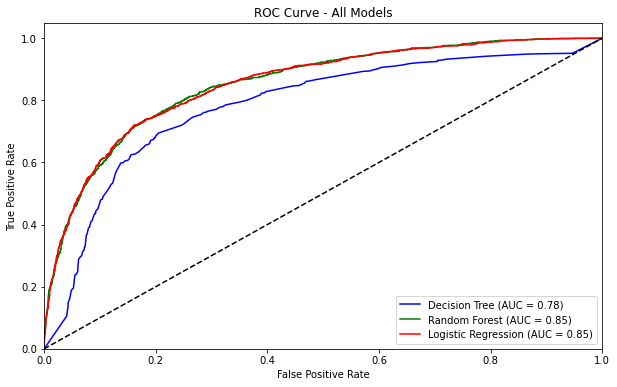

In [40]:
plt.figure(figsize=(10, 6))

# Plot Decision Tree ROC curve
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})', color='blue')

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.2f})', color='green')

# Plot Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_score_lr:.2f})', color='red')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend(loc='lower right')
plt.show()